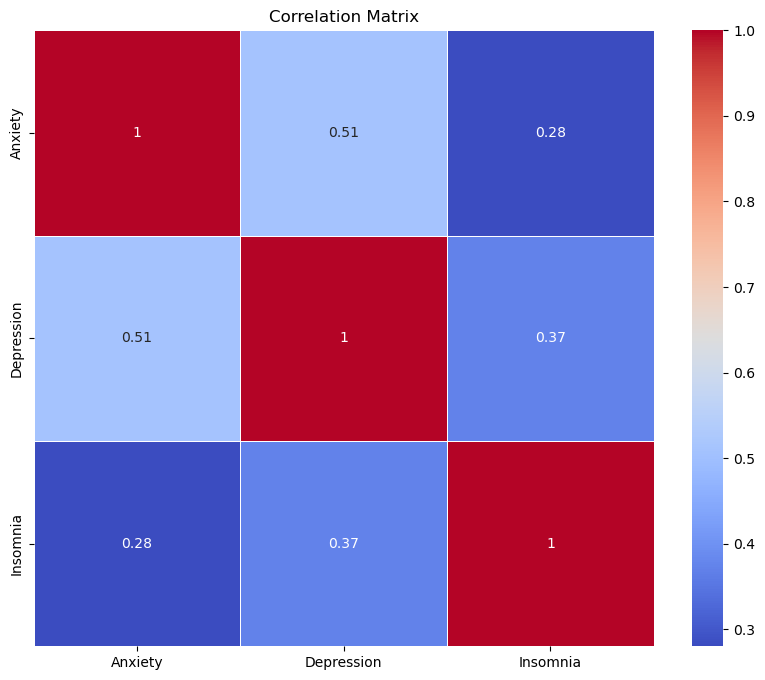

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('Cleaned_Data.csv')

# Select the columns of interest
frequency_cols = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                  'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                  'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
emotional_cols = ['Anxiety', 'Depression', 'Insomnia']

# Subset the data for the selected columns
subset_data = data[frequency_cols + emotional_cols]

# Compute the correlation matrix
correlation_matrix = subset_data.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Load the dataset
data = pd.read_csv('Cleaned_Data.csv')

# Select the columns of interest
frequency_cols = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                  'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                  'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
emotional_cols = ['Anxiety', 'Depression', 'Insomnia']
target_col = 'Music effects'

# Subset the data for the selected columns
subset_data = data[frequency_cols + emotional_cols + [target_col]]

# Separate the features (X) and the target variable (y)
X = subset_data.drop(target_col, axis=1)
y = subset_data[target_col]

# Define column transformer to handle categorical variables
categorical_features = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                        'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)


# Perform cross-validation
cross_val_scores = cross_val_score(svm, X, y, cv=5)
cross_val_avg = cross_val_scores.mean()

# Generate classification report
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Cross Validation Score:", cross_val_avg)
print(classification_rep)


Accuracy: 0.6853146853146853
F1 Score: 0.5573513623306154
Recall Score: 0.6853146853146853
Precision Score: 0.7843415325932809
Cross Validation Score: 0.7493056239535113
              precision    recall  f1-score   support

     Improve       0.69      1.00      0.81        98
   No effect       1.00      0.00      0.00        42
      Worsen       1.00      0.00      0.00         3

    accuracy                           0.69       143
   macro avg       0.90      0.33      0.27       143
weighted avg       0.78      0.69      0.56       143



In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Load the dataset
data = pd.read_csv('Cleaned_Data.csv')

# Select the columns of interest
frequency_cols = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                  'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                  'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
emotional_cols = ['Anxiety', 'Depression', 'Insomnia']
target_col = 'Music effects'

# Subset the data for the selected columns
subset_data = data[frequency_cols + emotional_cols + [target_col]]

# Separate the features (X) and the target variable (y)
X = subset_data.drop(target_col, axis=1)
y = subset_data[target_col]

# Define column transformer to handle categorical variables
categorical_features = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                        'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Neural Network classifier
nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Set with_mean=False for sparse input data
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

# Train the Neural Network classifier on the training data
nn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn.predict(X_test)

# Calculate evaluation metrics
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(nn, X, y, cv=5)
cross_val_avg = cross_val_scores.mean()

# Generate classification report
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Cross Validation Score:", cross_val_avg)
print(classification_rep)



Accuracy: 0.6573426573426573
F1 Score: 0.5952194357366771
Recall Score: 0.6573426573426573
Precision Score: 0.5758547008547009
Cross Validation Score: 0.6581798483206934
              precision    recall  f1-score   support

     Improve       0.71      0.91      0.79        98
   No effect       0.31      0.12      0.17        42
      Worsen       0.00      0.00      0.00         3

    accuracy                           0.66       143
   macro avg       0.34      0.34      0.32       143
weighted avg       0.58      0.66      0.60       143

Accuracy: 0.6573426573426573
F1 Score: 0.5952194357366771
Recall Score: 0.6573426573426573
Precision Score: 0.5758547008547009
Cross Validation Score: 0.6581798483206934
              precision    recall  f1-score   support

     Improve       0.71      0.91      0.79        98
   No effect       0.31      0.12      0.17        42
      Worsen       0.00      0.00      0.00         3

    accuracy                           0.66       143
   macr

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Load the dataset
data = pd.read_csv('Cleaned_Data.csv')

# Select the columns of interest
frequency_cols = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                  'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                  'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
emotional_cols = ['Anxiety', 'Depression', 'Insomnia']
target_col = 'Music effects'

# Subset the data for the selected columns
subset_data = data[frequency_cols + emotional_cols + [target_col]]

# Separate the features (X) and the target variable (y)
X = subset_data.drop(target_col, axis=1)
y = subset_data[target_col]

# Define column transformer to handle categorical variables
categorical_features = ['Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                        'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                        'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Train the Gradient Boosting classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)


# Perform cross-validation
cross_val_scores = cross_val_score(gb_classifier, X, y, cv=5)
cross_val_avg = cross_val_scores.mean()

# Generate classification report
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Cross Validation Score:", cross_val_avg)
print(classification_rep)


Accuracy: 0.6643356643356644
F1 Score: 0.5584267877812775
Recall Score: 0.6643356643356644
Precision Score: 0.5465288334853553
Cross Validation Score: 0.7044321875307791
              precision    recall  f1-score   support

     Improve       0.68      0.96      0.80        98
   No effect       0.20      0.02      0.04        42
      Worsen       1.00      0.00      0.00         3

    accuracy                           0.66       143
   macro avg       0.63      0.33      0.28       143
weighted avg       0.55      0.66      0.56       143

